   # Stock Prediction LSTM

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# reading from yahoo finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


In [3]:
yf.pdr_override()

In [4]:
from datetime import datetime
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)
print('Start date: ', start)
print('End date: ', end)

Start date:  2022-10-21 00:00:00
End date:  2023-10-21 18:08:28.607749


In [5]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [53]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [7]:
print(type(AAPL))
print(AAPL.shape)
AAPL

<class 'pandas.core.frame.DataFrame'>
(251, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-21,142.869995,147.850006,142.649994,147.270004,146.401505,86548600
2022-10-24,147.190002,150.229996,146.000000,149.449997,148.568634,75981900
2022-10-25,150.089996,152.490005,149.360001,152.339996,151.441589,74732300
2022-10-26,150.960007,151.990005,148.039993,149.350006,148.469223,88194300
2022-10-27,148.070007,149.050003,144.130005,144.800003,143.946045,109180200
...,...,...,...,...,...,...
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400


In [8]:
for company, company_name in zip(company_list, company_name):
    company["company_name"] = company_name

In [9]:
company

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-21,114.790001,119.589996,114.500000,119.320000,119.320000,55660500,AMAZON
2022-10-24,119.980003,120.389999,116.570000,119.820000,119.820000,49531500,AMAZON
2022-10-25,119.650002,121.320000,118.949997,120.599998,120.599998,50934600,AMAZON
2022-10-26,116.000000,119.349998,114.760002,115.660004,115.660004,68802300,AMAZON
2022-10-27,113.919998,114.120003,109.769997,110.959999,110.959999,129605400,AMAZON
...,...,...,...,...,...,...,...
2023-10-16,130.690002,133.070007,130.429993,132.550003,132.550003,42832900,AMAZON
2023-10-17,130.389999,132.580002,128.710007,131.470001,131.470001,49344600,AMAZON
2023-10-18,129.899994,130.669998,127.510002,128.130005,128.130005,42699500,AMAZON


In [10]:
dataset = pd.concat(company_list, axis=0) # concatenate all companies rows

In [11]:
dataset

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-21,142.869995,147.850006,142.649994,147.270004,146.401505,86548600,APPLE
2022-10-24,147.190002,150.229996,146.000000,149.449997,148.568634,75981900,APPLE
2022-10-25,150.089996,152.490005,149.360001,152.339996,151.441589,74732300,APPLE
2022-10-26,150.960007,151.990005,148.039993,149.350006,148.469223,88194300,APPLE
2022-10-27,148.070007,149.050003,144.130005,144.800003,143.946045,109180200,APPLE
...,...,...,...,...,...,...,...
2023-10-16,130.690002,133.070007,130.429993,132.550003,132.550003,42832900,AMAZON
2023-10-17,130.389999,132.580002,128.710007,131.470001,131.470001,49344600,AMAZON
2023-10-18,129.899994,130.669998,127.510002,128.130005,128.130005,42699500,AMAZON


In [12]:
dataset.shape

(1004, 7)

## Descriptive Statistics about the data

In [13]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,169.205672,171.180956,167.407945,169.359597,169.008854,4.641814e+07
std,77.090318,77.726802,76.482681,77.113555,76.795373,2.673524e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,106.150003,108.007498,105.077501,106.248751,106.248751,2.463022e+07
50%,138.525002,139.459999,136.850006,138.340004,138.174995,4.274050e+07
75%,201.567505,203.774998,199.817497,200.899998,200.188805,6.042798e+07
max,361.750000,366.779999,352.440002,359.489990,358.730469,2.231334e+08


In [14]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,163.819841,165.535219,162.311116,164.001235,163.638182,6.517037e+07
std,18.758672,18.560417,18.981563,18.737732,18.912595,2.119619e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,148.165001,150.309998,147.139999,148.489998,148.084923,5.053360e+07
50%,165.190002,167.039993,165.110001,166.169998,165.716690,5.958120e+07
75%,178.275002,179.985001,177.090004,178.500000,178.499405,7.433530e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-10-21 to 2023-10-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1004 non-null   float64
 1   High          1004 non-null   float64
 2   Low           1004 non-null   float64
 3   Close         1004 non-null   float64
 4   Adj Close     1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   company_name  1004 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.8+ KB


In [16]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-10-21 to 2023-10-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Closing price

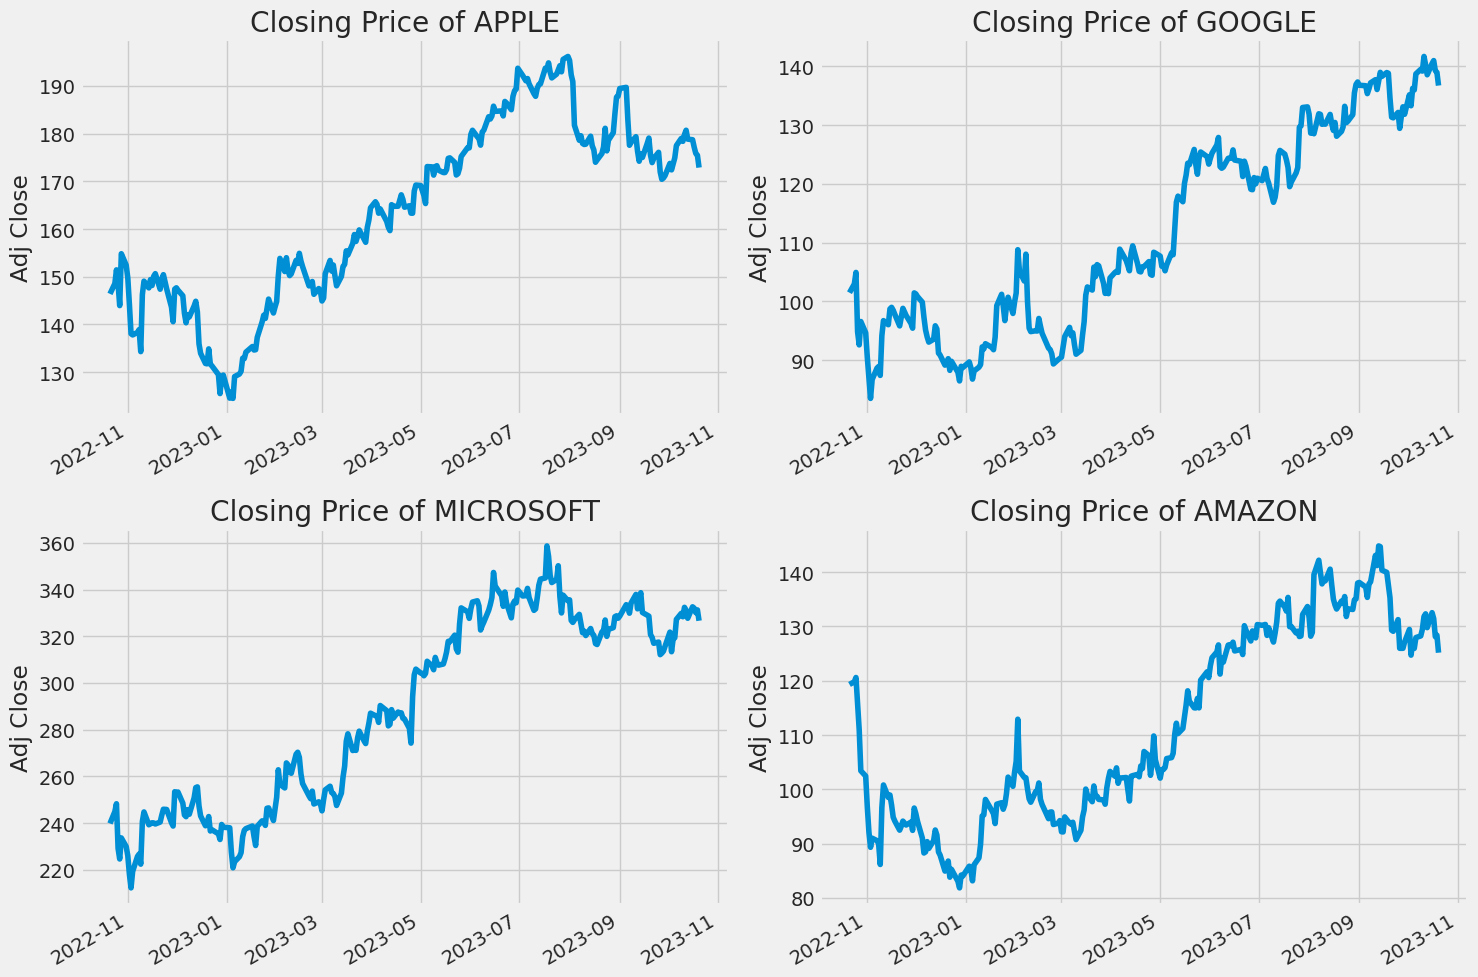

In [54]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {company_name[i-1]}')

plt.tight_layout()

## Volume of sales

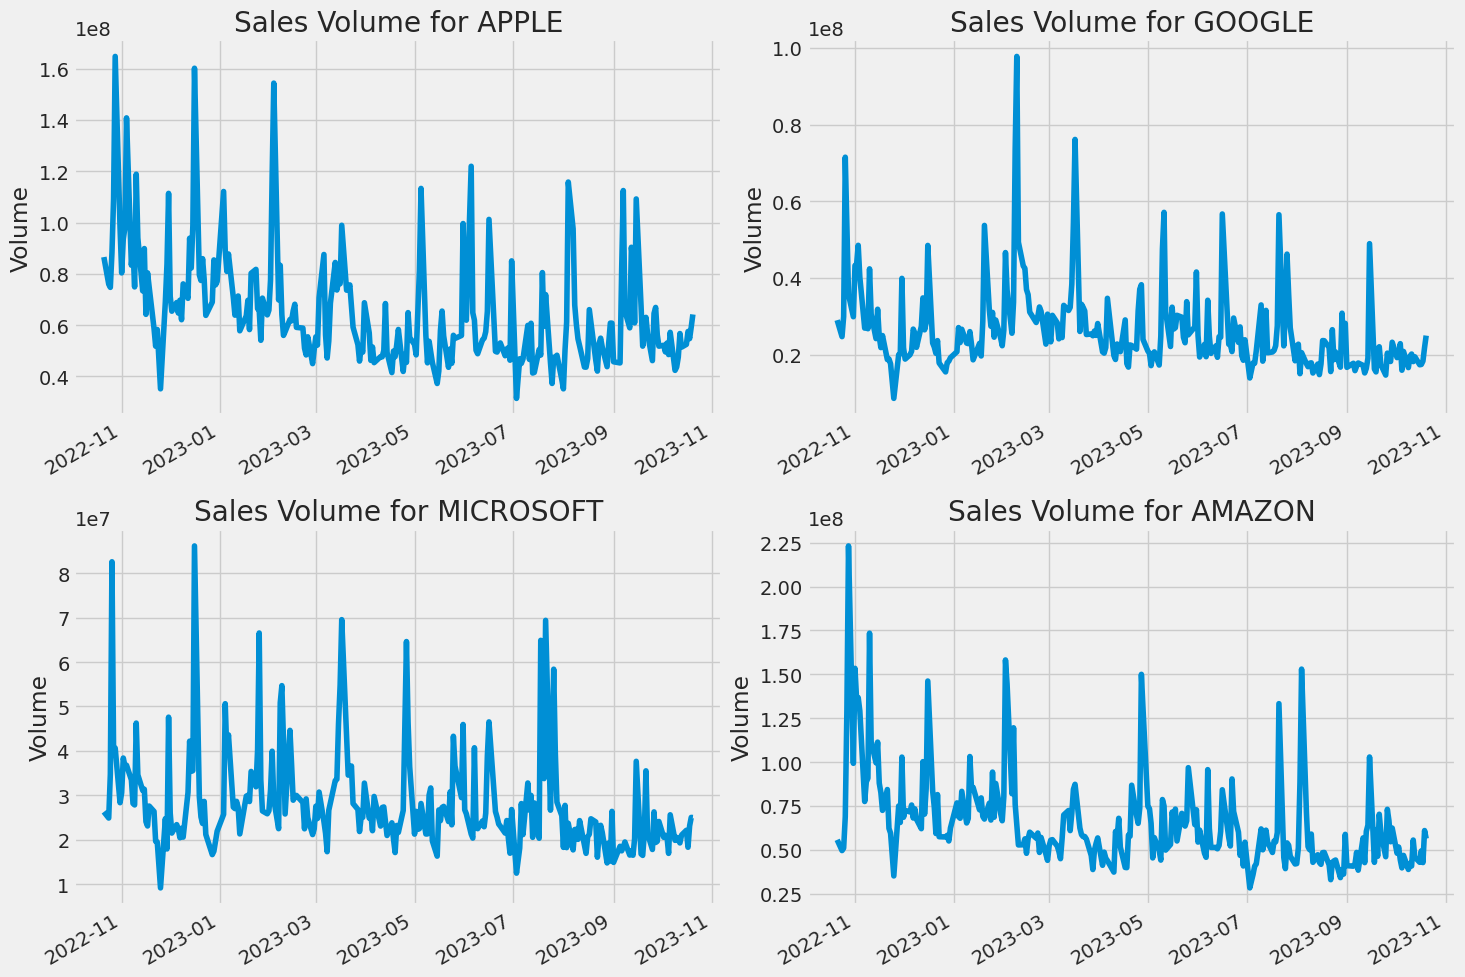

In [55]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Sales Volume for {company_name[i-1]}')
plt.tight_layout()

## Moving Average 

In [42]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

Text(0.5, 1.0, 'Amazon')

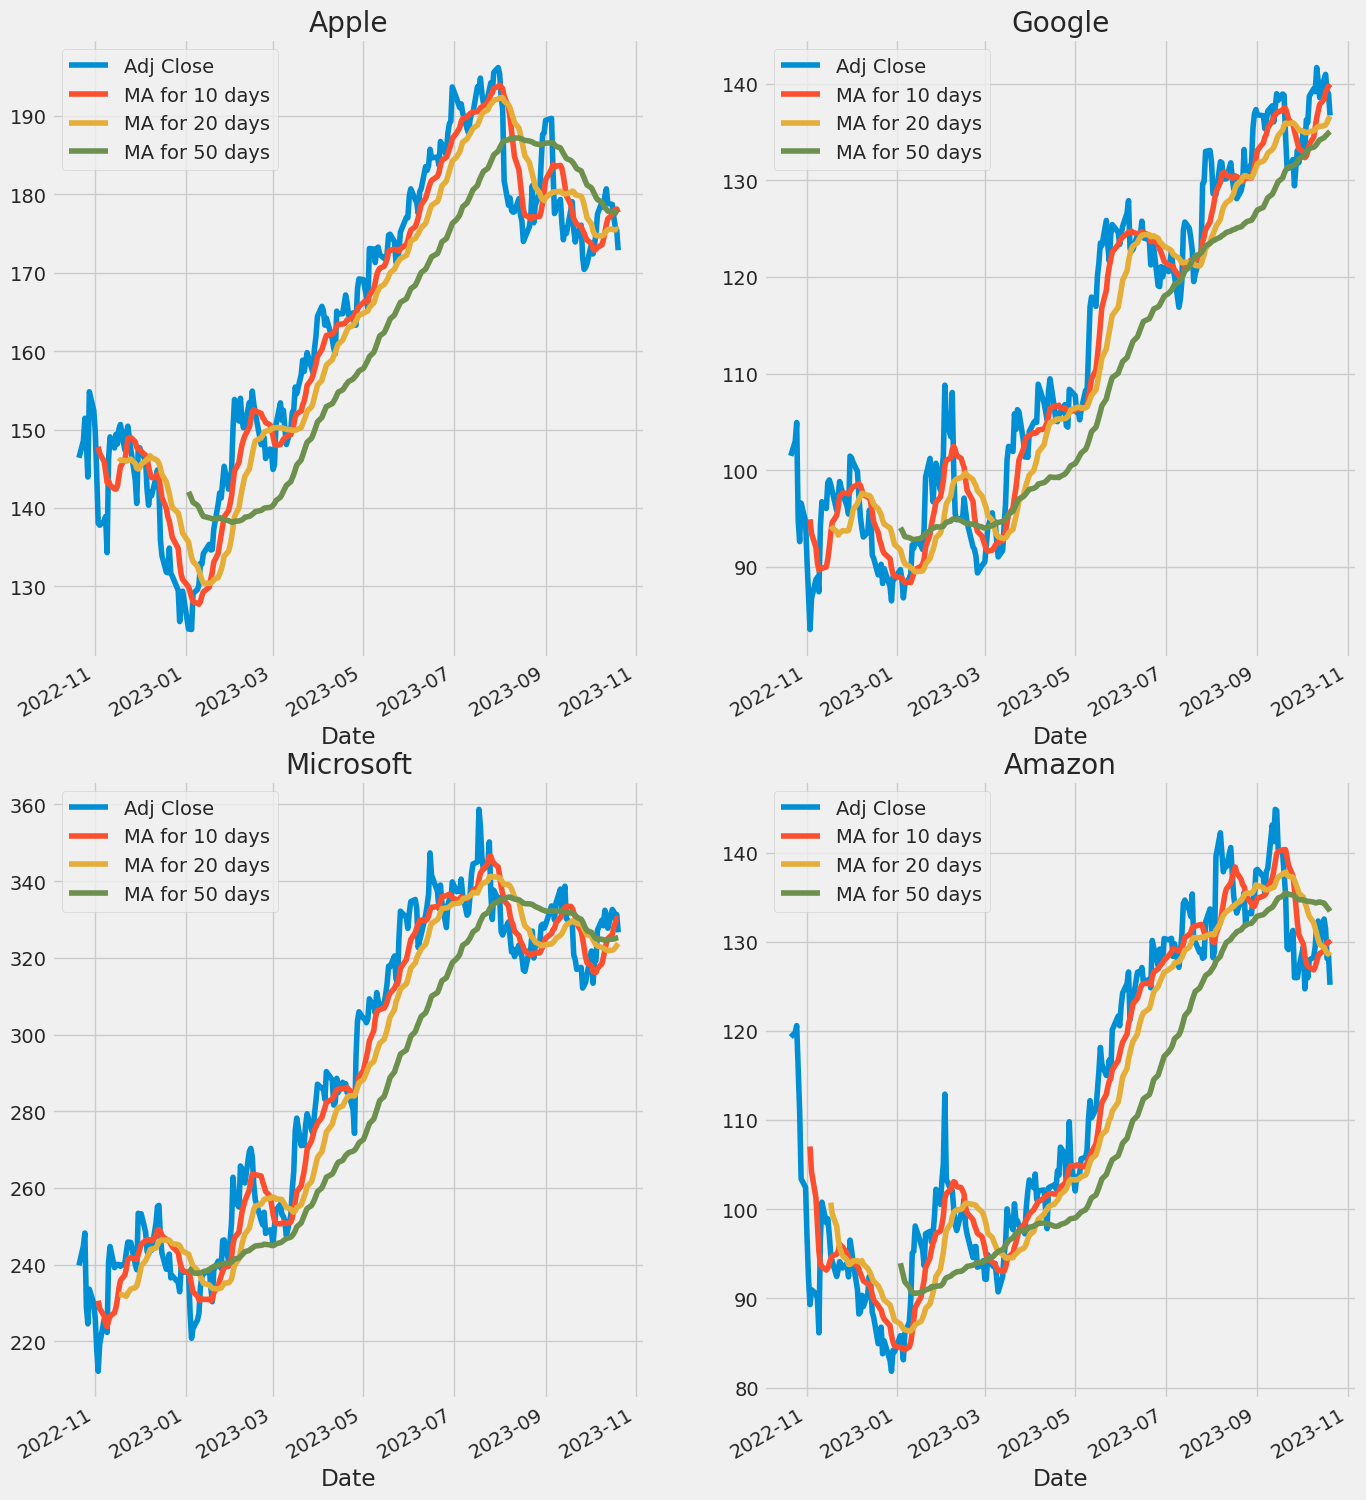

In [45]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(20)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,0])
axes[0,0].set_title('Apple')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,1])
axes[0,1].set_title('Google')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,0])
axes[1,0].set_title('Microsoft')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,1])
axes[1,1].set_title('Amazon')

## Daily Return 

In [46]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

Text(0.5, 1.0, 'Amazon')

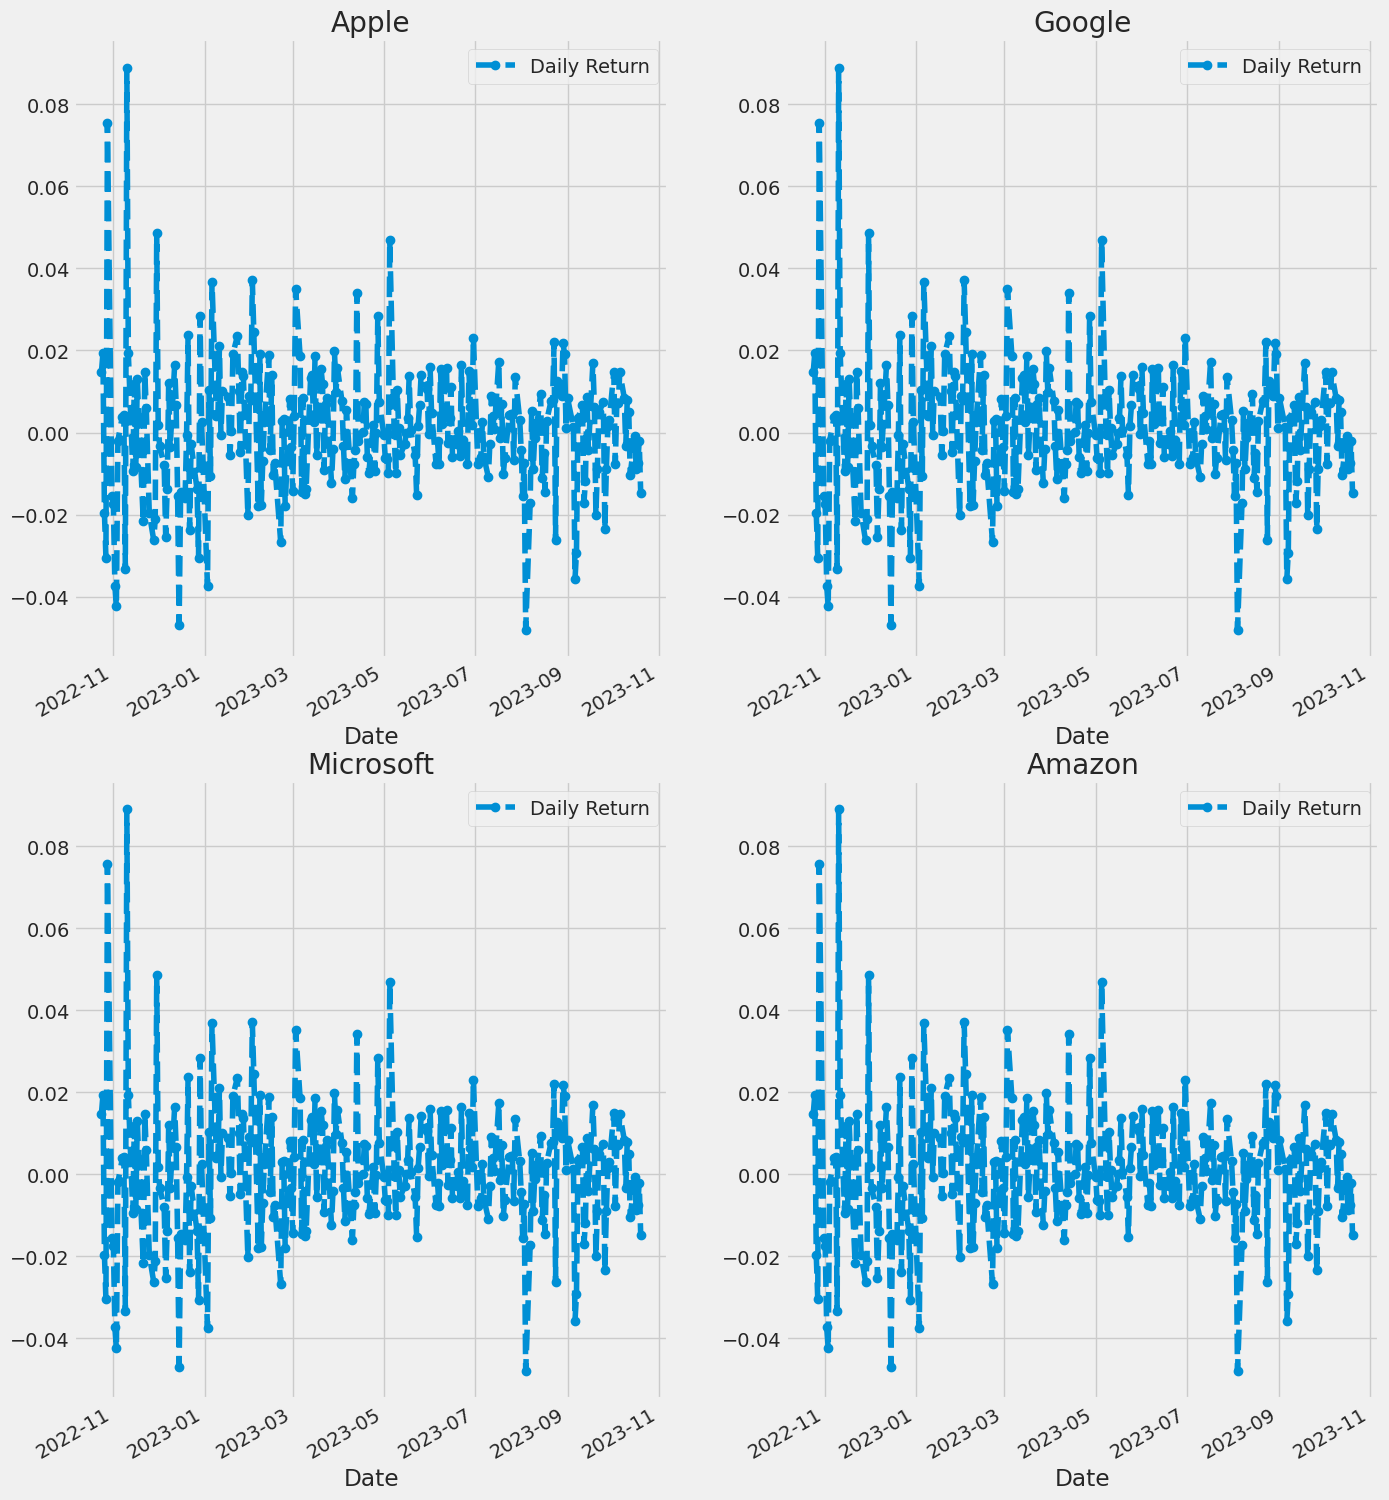

In [47]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(20)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend = True, linestyle = '--', marker = 'o')
axes[0,0].set_title('Apple')

AAPL['Daily Return'].plot(ax=axes[0,1], legend = True, linestyle = '--', marker = 'o')
axes[0,1].set_title('Google')

AAPL['Daily Return'].plot(ax=axes[1,0], legend = True, linestyle = '--', marker = 'o')
axes[1,0].set_title('Microsoft')

AAPL['Daily Return'].plot(ax=axes[1,1], legend = True, linestyle = '--', marker = 'o')
axes[1,1].set_title('Amazon')

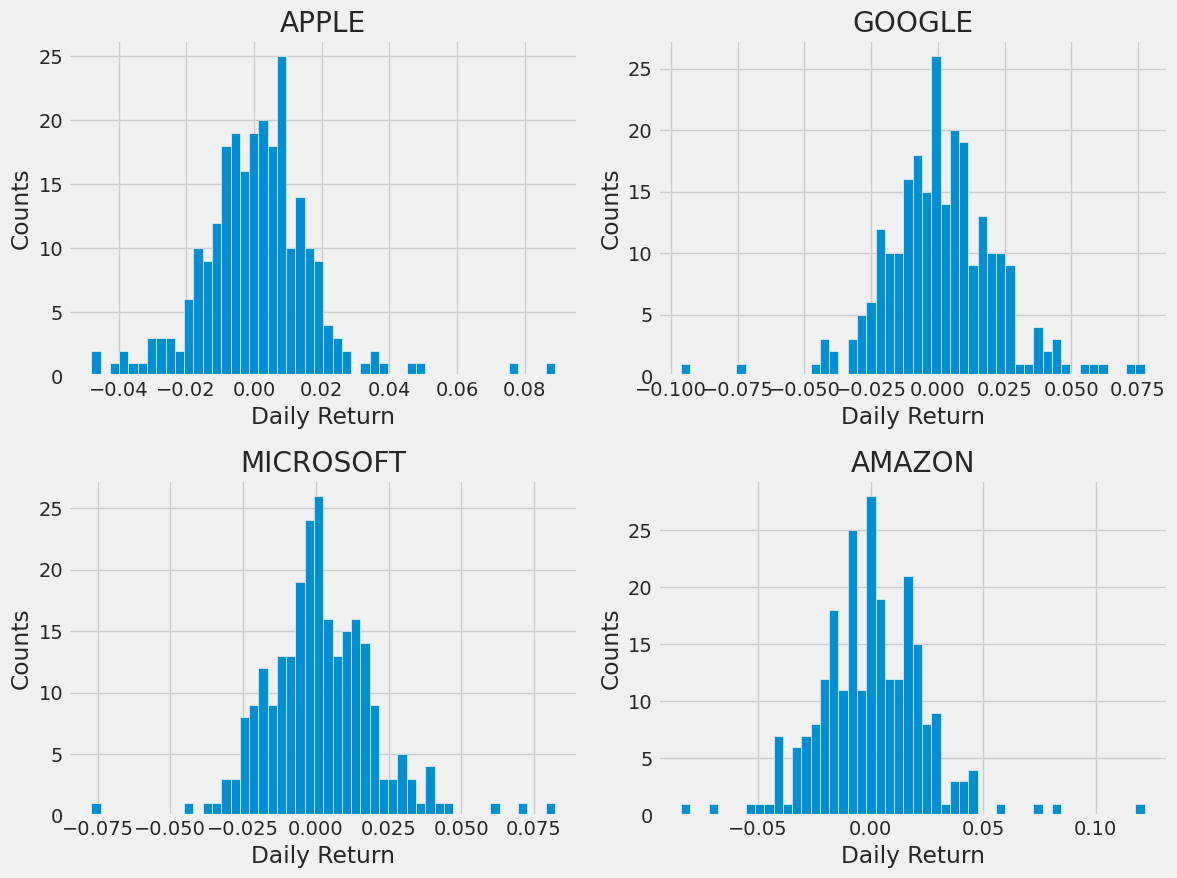

In [58]:
plt.figure(figsize=(12,9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')
    
plt.tight_layout()

In [65]:
closing_df = pdr.get_data_yahoo(tech_list, start = start, end = end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [69]:
closing_df

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-10-21,146.401505,119.320000,101.480003,239.803299
2022-10-24,148.568619,119.820000,102.970001,244.884216
2022-10-25,151.441589,120.599998,104.930000,248.261597
2022-10-26,148.469223,115.660004,94.820000,229.106659
2022-10-27,143.946060,110.959999,92.599998,224.580368
...,...,...,...,...
2023-10-16,178.720001,132.550003,140.490005,332.640015
2023-10-17,177.149994,131.470001,140.990005,332.059998
2023-10-18,175.839996,128.130005,139.279999,330.109985


In [70]:
tech_rets = closing_df.pct_change()
tech_rets

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-10-21,NaN,NaN,NaN,NaN
2022-10-24,0.014803,0.004190,0.014683,0.021188
2022-10-25,0.019338,0.006510,0.019035,0.013792
2022-10-26,-0.019627,-0.040962,-0.096350,-0.077156
2022-10-27,-0.030465,-0.040636,-0.023413,-0.019756
...,...,...,...,...
2023-10-16,-0.000727,0.021265,0.013783,0.014982
2023-10-17,-0.008785,-0.008148,0.003559,-0.001744
2023-10-18,-0.007395,-0.025405,-0.012129,-0.005872


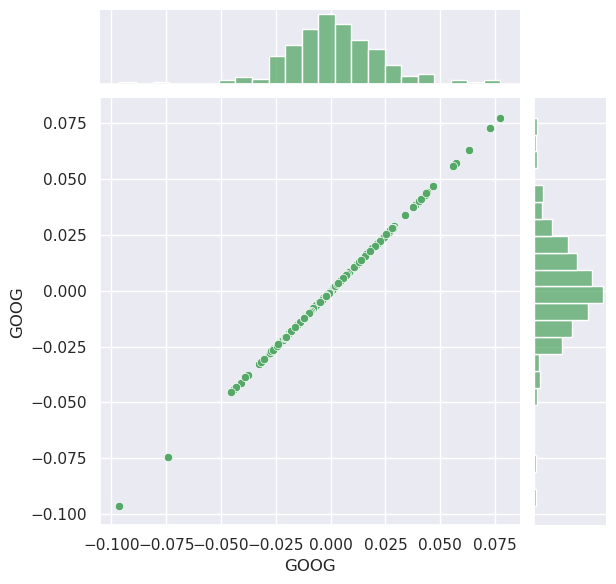

In [78]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color = 'g')

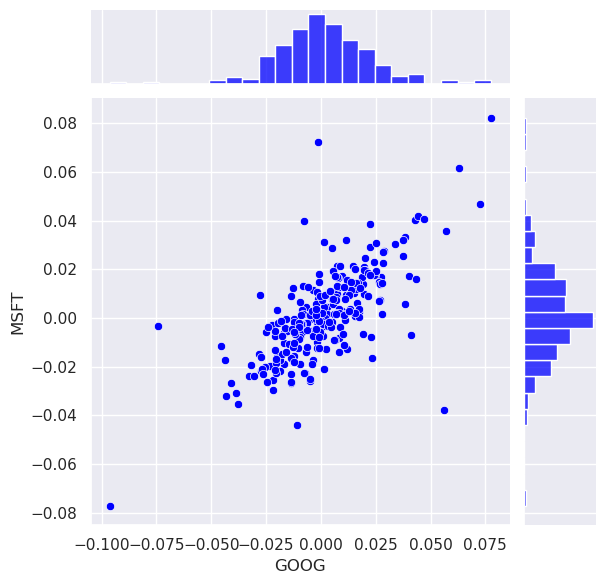

In [81]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color = 'blue')

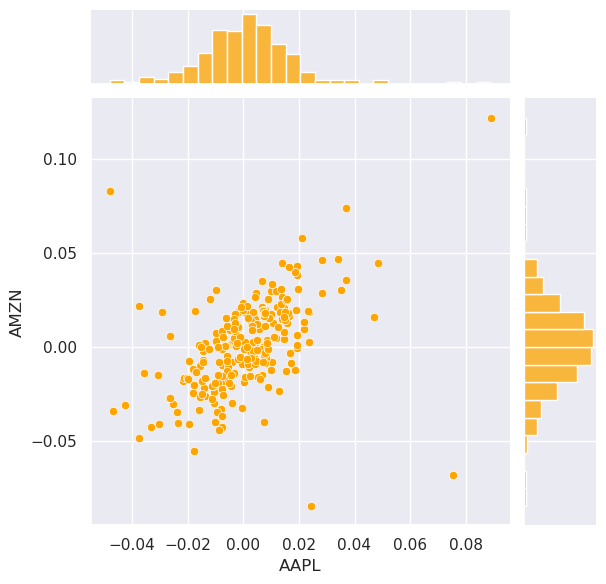

In [83]:
sns.jointplot(x='AAPL', y='AMZN', data=tech_rets, kind='scatter', color = 'orange')

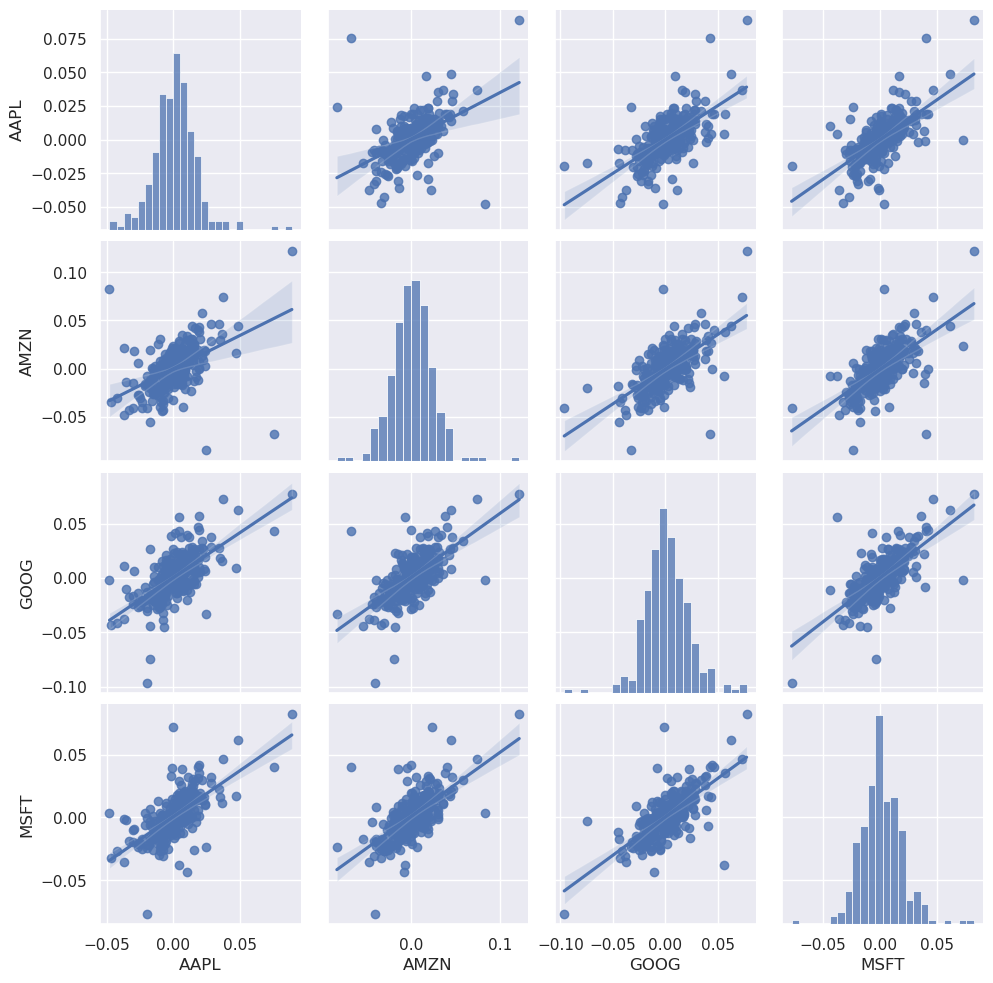

In [91]:
sns.pairplot(tech_rets, kind = 'reg')

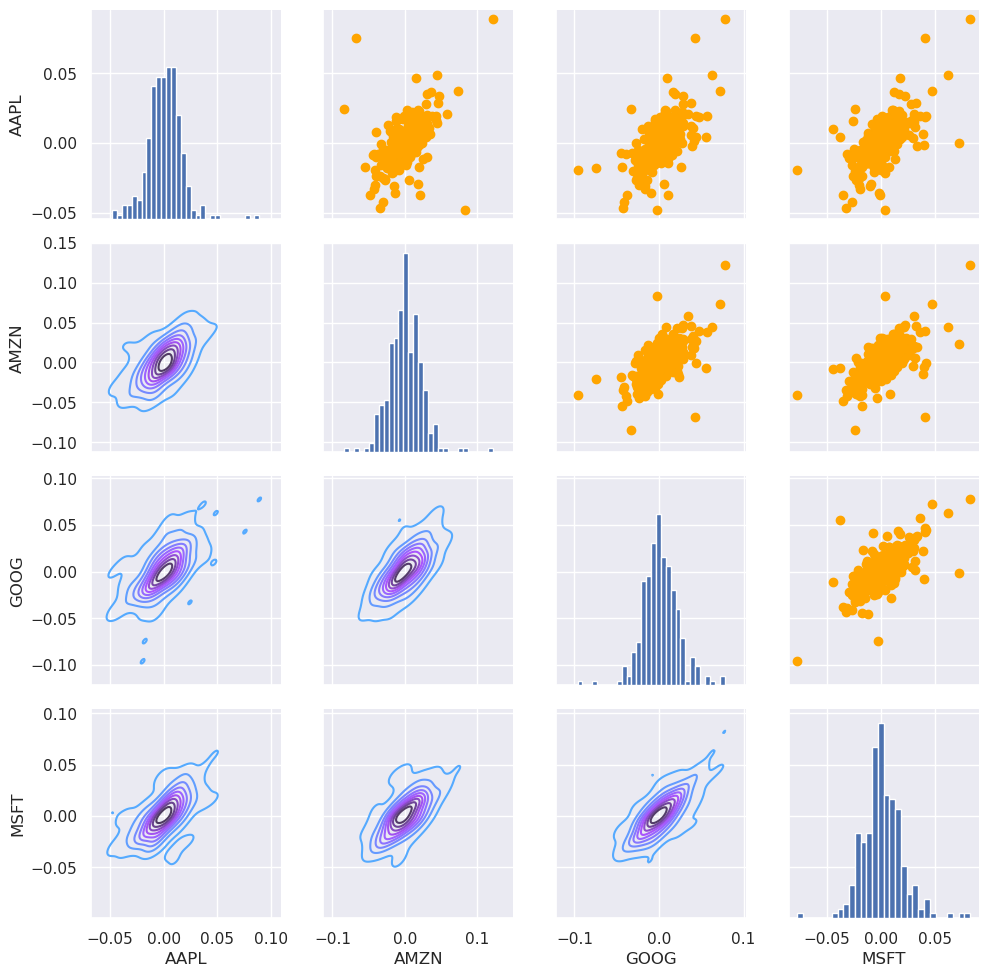

In [98]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color = 'orange')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

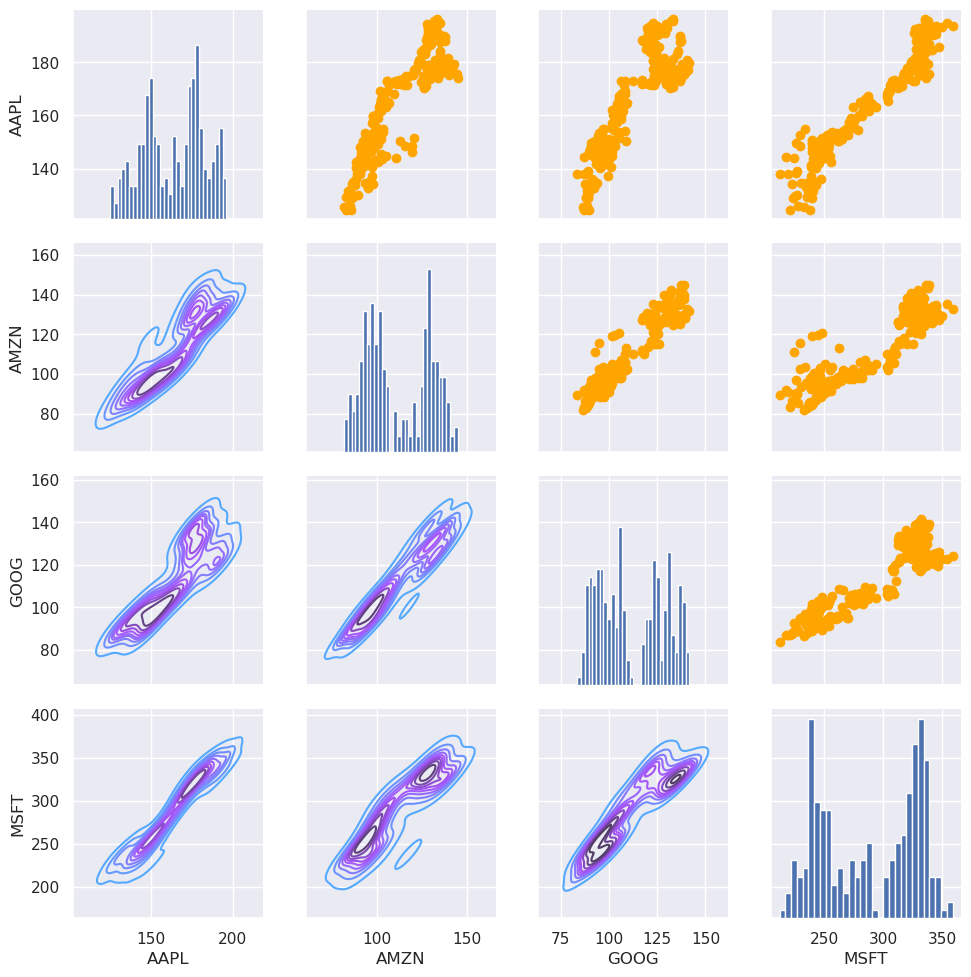

In [99]:
return_fig = sns.PairGrid(closing_df)
return_fig.map_upper(plt.scatter, color = 'orange')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

Text(0.5, 1.0, 'Correlation Of Stock Price')

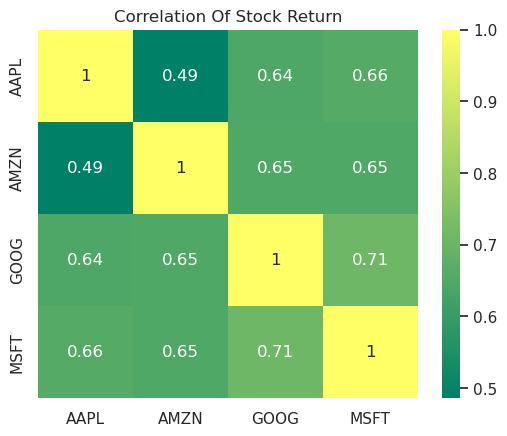

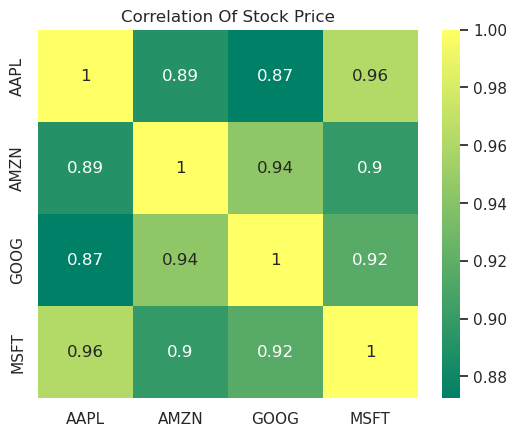

In [108]:
plt.figure(figsize= (12, 10))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot = True, cmap = 'summer')
plt.title('Correlation Of Stock Return')

plt.figure(figsize= (12, 10))
plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot = True, cmap = 'summer')
plt.title('Correlation Of Stock Price')

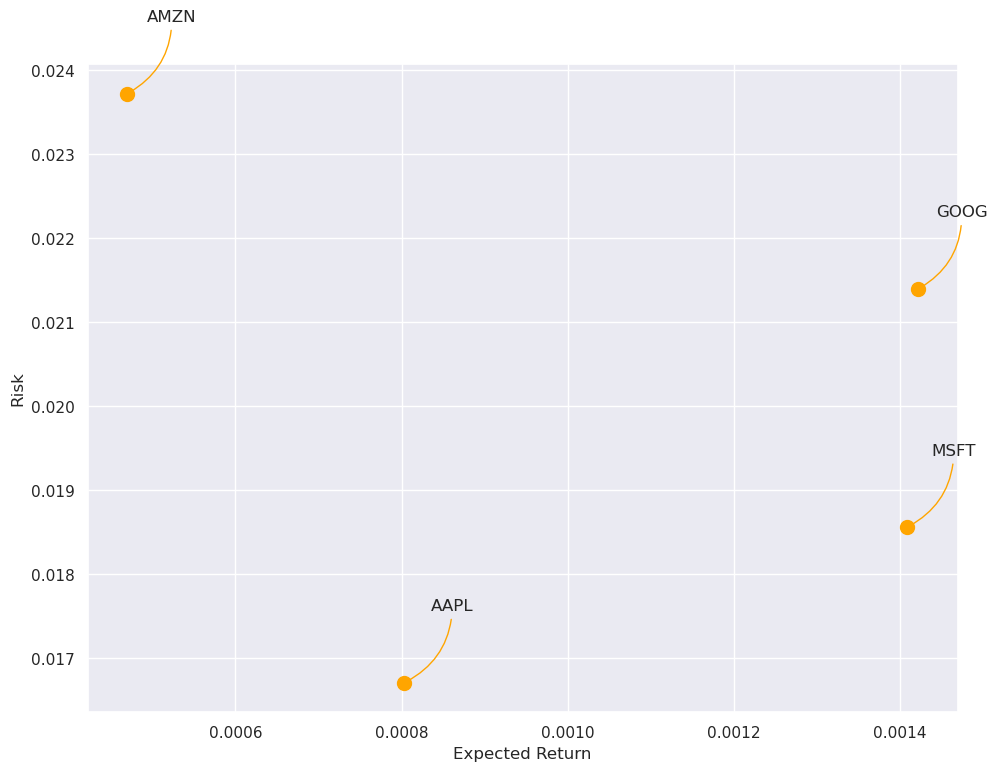

In [121]:
rets = tech_rets.dropna()
plt.figure(figsize = (10, 8))
plt.scatter(rets.mean(), rets.std(), s = 100, color = 'orange')
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext = (50, 50), textcoords = 'offset points', 
                 ha ='right', va = 'bottom', arrowprops = dict(arrowstyle = '-', color = 'orange'
                                                               , connectionstyle = 'arc3,rad=-0.3'))

## Predicting Stock Price Of Apple 

In [128]:
apple_df = pdr.get_data_yahoo('AAPL', start = '2012-01-01', end = datetime.now())
apple_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466094,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672228,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804700,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784391,394024400
...,...,...,...,...,...,...
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400


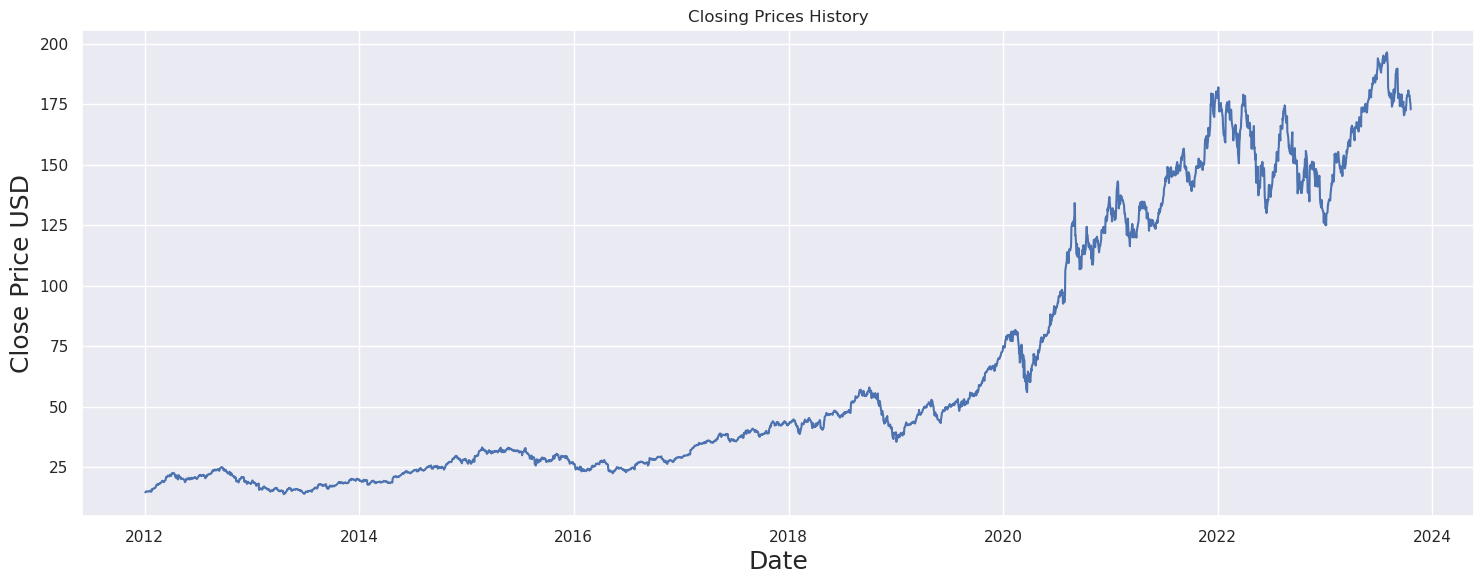

In [132]:
plt.figure(figsize=(16,6))
plt.title('Closing Prices History')
plt.plot(apple_df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [142]:
data = apple_df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*0.95))
training_data_len

2822

In [150]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.88707003],
       [0.88498793],
       [0.87085113]])

In [155]:
train_data = scaled_data[:int(training_data_len), :]
train_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.77287984],
       [0.78603031],
       [0.79633156]])

In [164]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]
[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.005

In [165]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2762, 60, 1)

In [168]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [177]:
model = Sequential()
model.add(LSTM(128, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2023-10-21 21:47:54.890026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-21 21:47:54.891112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-21 21:47:54.891903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1185/2762 [===========>..................] - ETA: 1:05 - loss: 0.0017

KeyboardInterrupt: 